# Analyse der Tweets von Bundestagsabgeordneten
## 1. Dataset preparation

In [1]:
import pymongo

client = pymongo.MongoClient("mongodb://localhost:27017/")

db = client['Twitter']
All_Tweets_collection = db['twitter_mdp_ex_date_proj']


In [2]:
import pandas as pd
import pymongo
import datetime

pd.set_option('display.max_colwidth', 0)

# sample_df = pd.DataFrame(list(All_Tweets_collection.aggregate([ {"$sample": {"size": 50 }}], 
#                                      allowDiskUse=True
#                                    )))

time_sample_df = pd.DataFrame(list(All_Tweets_collection.find( {
            'created_at_datetime': {'$gte': datetime.datetime(2020,1,1,0,0,0),
                                    '$lt': datetime.datetime(2020,5,10,0,0,0)},
            'retweeted_id': None
            })
        ))

In [3]:
import json
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 0)
    
    
filepath = '/home/lisa/Darmstadt/Master Arbeit/05_Data/Scrapy/Twitter_user/Twitter_user/spiders/'
parteien = ['Union', 'SPD', 'Gruene', 'Linke', 'FDP', 'AFD']
parteien_list= {}

users = time_sample_df.user_screen_name

for partei in parteien:
    with open(filepath + partei + '_twitter_Names.json', newline='\n') as json_file:
        Screennames = json.load(json_file)
        parteien_list[str(partei)] = Screennames
        

#for name in set(user_df.screen_name):  #set statt list, wir brauchen jeden User nur einmal
for user in set(users):
    for partei in parteien_list:
        if user in parteien_list[partei]:
            for i in time_sample_df[time_sample_df.user_screen_name == user].index:
                time_sample_df.loc[i, 'Partei'] = partei

#         else:
#             emo_df.at[word, emo] = 0

time_sample_df.head(2)

,_id,created_at,created_at_datetime,full_text,id,is_quote_status,lang,retweet_count,user_created_at,user_description,user_followers_count,user_friends_count,user_id,user_location,user_name,user_screen_name,Partei
0,5e954d137973ce357347fb37,Mon Apr 13 09:42:38 +0000 2020,2020-04-13 09:42:38,"Kein Mensch braucht #umfaller/ #fdp weder in der Politik, noch in den Medien... 🙄 https://t.co/qjmEYF73jv",1249634086966132742,True,de,9,Fri Mar 25 13:46:18 +0000 2016,"*Herten, seit 1996 in Gera. MdB seit 10/2017 (vorh. MdL Thüringen ab 10/2014), Vors. Rechtsausschuß bis 13.11.2019 (abgesetzt v. d. Altparteien) Hier: Privat!😎",9341,676,713361366858481664,"Mal hier, mal da...",🇩🇪Stephan Brandner🇩🇪,StBrandner,AFD
1,5e954d137973ce357347fb38,Mon Apr 13 09:32:45 +0000 2020,2020-04-13 09:32:45,Ganz einfach:\nWeil es (zumal auf Dauer!) niemals ein „datenschutzgerechtes Tool“ geben und das ein weiterer großer Schritt Richtung Überwachungsstaat sein wird!\nIch wünsche mir dringend etwas mehr Problembewusstsein und kritische Distanz beim Datenschutzbeauftragten! https://t.co/Rx0cAhIc97,1249631600658337793,True,de,23,Fri Mar 25 13:46:18 +0000 2016,"*Herten, seit 1996 in Gera. MdB seit 10/2017 (vorh. MdL Thüringen ab 10/2014), Vors. Rechtsausschuß bis 13.11.2019 (abgesetzt v. d. Altparteien) Hier: Privat!😎",9341,676,713361366858481664,"Mal hier, mal da...",🇩🇪Stephan Brandner🇩🇪,StBrandner,AFD


In [ ]:
time_sample_df.groupby('Partei').size()
#time_sample_df[time_sample_df.Partei.isnull()].user_screen_name

### Text Cleaning

In [4]:
# Load the regular expression library
pd.set_option('display.max_colwidth', 0)
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F900-\U0001F9FF"  # https://www.compart.com/de/unicode/block/U+1F900
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


sample_df=time_sample_df
# Remove punctuation
sample_df['full_text_processed'] = sample_df['full_text'].map(lambda x: re.sub('[,\.!?#@\\n"“„\:;&\(\)]', '', x))
# Remove Links
sample_df['full_text_processed'] = sample_df['full_text_processed'].map(lambda x: re.sub('http.*', '', x))

sample_df['full_text_processed'] = sample_df['full_text_processed'].map(lambda x: re.sub('amp', '', x))
# Convert the titles to lowercase
#sample_df['full_text_processed'] = sample_df['full_text_processed'].map(lambda x: x.lower())

#sample_df['full_text_processed'] = sample_df['full_text_processed'].map(lambda x: remove_emoji(x))
# Print out the first rows of papers
sample_df['full_text_processed'].head(200)

0      Kein Mensch braucht umfaller/ fdp weder in der Politik noch in den Medien 🙄                                                                                                                                                                                            
1      Ganz einfachWeil es zumal auf Dauer niemals ein datenschutzgerechtes Tool geben und das ein weiterer großer Schritt Richtung Überwachungsstaat sein wirdIch wünsche mir dringend etwas mehr Problembewusstsein und kritische Distanz beim Datenschutzbeauftragten      
2      Fordern wir schon lange Endlich bewegen sich auch die Altparteien AfDwirkt                                                                                                                                                                                             
3      zeitonline_pol Fordern wir schon lange Endlich bewegen sich auch die Altparteien AfDwirkt                                                                                           

#### Durchsuche nach Tweets und sortiere aus

In [5]:
# Print words that match certain words:
#sample_df['full_text_processed'][sample_df['full_text_processed'].str.match(r'.*brexit.*')==True]

# Remove Tweets that match certain words:
sample_df = sample_df[~sample_df.full_text_processed.str.contains("fröhlicher gruss")]
#time_sample_df.groupby('Partei').size()
#sample_df.groupby('Partei').size()

#### Stopwords

In [ ]:
#from stop_words import get_stop_words
#stop_words = get_stop_words('de')

import stopwordsiso as stopwords
stop_words = list(stopwords.stopwords(["de"])) 

mehr_sw = ['der', 'die', 'das', 'ist' 'es', 'gibt', 'und', 'für', 'auf', 'aus', 'mit', 'dem', 'tb', 'cducsubt', 'spdbt', 'fdpbt', 'sdpde']
for word in mehr_sw:
    stop_words.append(word)
    


#### Unterteilung in Bins und erstellen eines Dictionarys für Zeiträume

In [6]:
# Sortieren nach Datum/Zeit
sample_df = sample_df.sort_values(by = ['created_at_datetime'])

# Zerschneiden in Bins
sample_df['bins'] = pd.cut(sample_df['created_at_datetime'], bins=15, labels=list(range(1,16)))

labels=list(range(1,16))
weeks = {}
    
for i in labels:
    weeks['week_'+str(i)] = sample_df[sample_df['bins'] == i]    

bin_sum_per_week = {}

for label in range(1,16): 
    df = sample_df[sample_df['bins'] == label]
    head = list(df.created_at_datetime.head(1))[0]
    tail = list(df.created_at_datetime.tail(1))[0]
    bin_sum_per_week[label] = {}
    bin_sum_per_week[label]['Von'] = head
    bin_sum_per_week[label]['Bis'] = tail
#bin_sum_per_week


#### Erstellen eines Dictionary für Parteizugehörikgeit

In [ ]:
partei_dic = {}

for partei in parteien:
    partei_dic['tweets_'+ partei] = sample_df[sample_df['Partei'] == partei]  

# EDA

In [7]:
mdp_tweets = sample_df[['created_at_datetime','user_screen_name','Partei']]
mdp_tweets.head()

,created_at_datetime,user_screen_name,Partei
61739,2020-01-01 00:00:57,UdoHemmelgarn,AFD
39899,2020-01-01 00:01:23,kaiwegner,Union
61738,2020-01-01 00:03:41,UdoHemmelgarn,AFD
54692,2020-01-01 00:10:25,ch_buchholz,Linke
61737,2020-01-01 00:19:58,UdoHemmelgarn,AFD


In [8]:
date = []
for timestamp in mdp_tweets.created_at_datetime:
    date.append(timestamp.date())
    
mdp_tweets['date'] = date


/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [109]:
mdp_partei = mdp_tweets[['Partei', 'date']]
partei_piv = pd.pivot_table(mdp_partei, columns = 'Partei', index = 'date', aggfunc = np.count_nonzero )
partei_piv.max()

Partei
AFD       204
FDP       502
Gruene    470
Linke     508
SPD       646
Union     446
dtype: int64

In [171]:
partei_piv_dic = {}

for partei in parteien:
    partei_mdp = mdp_tweets[mdp_tweets['Partei'] == partei]
    patei_names = partei_mdp[['user_screen_name', 'date']]
    partei_piv = pd.pivot_table(patei_names, index = 'user_screen_name', aggfunc = np.count_nonzero )
    partei_piv_dic[partei] = partei_piv
    
partei_piv_dic['AFD']

,date
user_screen_name,
AfDProtschka,303
Alice_Weidel,102
Beatrix_vStorch,150
CorinnaMiazga,23
DrMEspendiller,175
ElsnervonGronow,57
EnricoKomning,23
Frohnmaier_AfD,74
GottfriedCurio,72


In [174]:
name_piv_dic = {}
    
for partei in parteien:
    partei_mdp = mdp_tweets[mdp_tweets['Partei'] == partei]
    partei_names = partei_mdp[['user_screen_name', 'date']]
    for name in set(partei_names['user_screen_name']):
        name_piv = pd.pivot_table(partei_names[partei_names['user_screen_name'] == name], index = 'date', aggfunc = np.count_nonzero)
        name_piv_dic[name] = name_piv
        

user_screen_name    36
dtype: int64

In [210]:
name_piv_dic['StBrandner'][name_piv_dic['StBrandner'].index == datetime.date(2020,2,6)]
sample_df[sample_df['user_screen_name'] == 'StBrandner', sample_df['datetime'] == datetime.date(2020,2,6)]
#name_piv_dic['StBrandner'].index


KeyError: 'datetime'

In [221]:
sample_df[datetime.date(sample_df['created_at_datetime']) == datetime.date(2020,2,6)]

TypeError: cannot convert the series to <class 'int'>

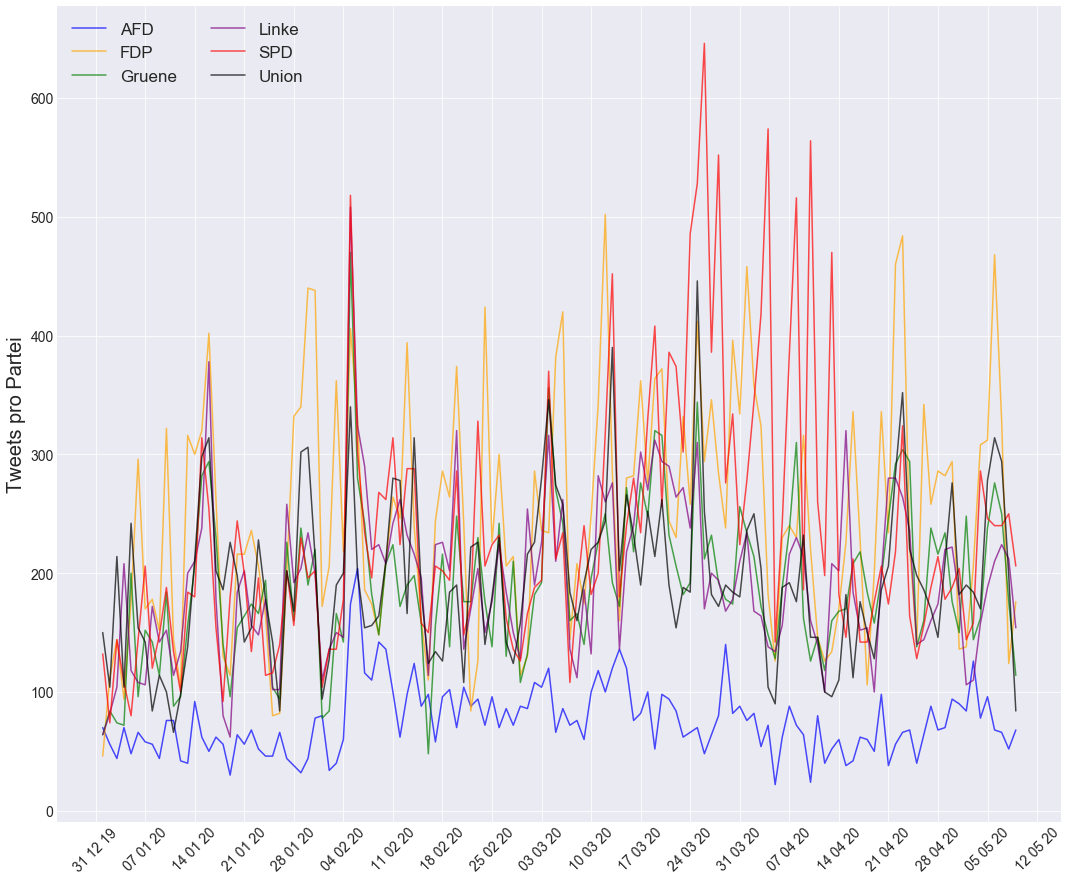

In [145]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

plt.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = plt.figure(figsize = (18, 15))
ax = fig.add_subplot(111)

num=0
for column in partei_piv:
    ax.plot(partei_piv.index, partei_piv[column], color = my_palette[num], alpha=0.7, label = column)
    num+=1
    
ylab = ax.set_ylabel('Tweets pro Partei', size = 20)
# = ax.set_xlabel('Datum', size = 20)
plt.legend(loc = 2, ncol = 2, fontsize = 17)

# y_tags
ytag = ax.set_yticklabels(np.arange(partei_piv.values.min()-122, partei_piv.values.max()+50, 100), fontsize = 14)

# x_tags
xtag = ax.set_xticklabels(partei_piv.index, rotation = 45, fontsize = 14)

months = mdates.MonthLocator()
weeks = mdates.WeekdayLocator()
months_fmt = mdates.DateFormatter('%d %m %y')

ax.xaxis.set_major_locator(weeks)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(weeks)



In [55]:
len(my_palette)
#len(partei_piv.columns)

6

# Wordclouds
#### Basic

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(sample_df['full_text_processed'])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

#fig, axs = plt.subplots(1,2)

#df['korisnika'].plot(ax=axs[0])
#df['osiguranika'].plot(ax=axs[1])

#### Wordcloud zu bestimmtem Zeitunkt

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

sample_df_date = sample_df[sample_df.created_at_datetime >= datetime.datetime(2020,5,8,0,0,0)]

# Join the different processed titles together.
long_string = ','.join(sample_df_date['full_text_processed'])
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=50000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=3)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure( figsize=(16,7) )
plt.imshow(wordcloud)
plt.axis("off")



#### Wordcloud Gegenüberstellung

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

party = 'SPD'

sample_df_partei = sample_df[sample_df.Partei == party]

date_dic_partei = {}
# for partei in parteien:
#     week_dic_partei['tweets_'+ partei] = date_dic_partei[sample_df['Partei'] == partei]  
    
for week in weeks:
    #date_dic_partei[week + '_' + 'AFD'] = weeks[week].loc("Partei" == 'AFD')
    date_dic_partei[week + '_' + party] = weeks[week].loc[weeks[week].Partei == party]
    #print(weeks[week].loc[weeks[week].Partei == "AFD"])



def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=3)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (18, 15))

for i, n in zip(date_dic_partei, range(1,16)):
    title = "%s - %s" % (bin_sum_per_week[n]['Von'].strftime('%d.%m.'),
                         bin_sum_per_week[n]['Bis'].strftime('%d.%m.%Y'))
 

    ax = fig.add_subplot(5,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    sample_df_week=date_dic_partei[i]
    long_string = ','.join(sample_df_week['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')

fig.suptitle(party + '_Tweets', fontsize=25, color='navy', y=1.05)

#### Wordcloud Gegenüberstellung von Parteien

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud


sample_df_date = sample_df[sample_df.created_at_datetime >= datetime.datetime(2020,5,8,0,0,0)]

partei_dic_date = {}
for partei in parteien:
    partei_dic_date['tweets_'+ partei] = sample_df_date[sample_df['Partei'] == partei]  


def FktWordCloud(long_string):
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words, min_word_length=3)
    wordcloud.generate(long_string)
    wordcloud.to_image()
    return wordcloud

fig = plt.figure(figsize = (16, 16))
#fig.subplots_adjust(top=0.8)

for partei, n in zip(partei_dic_date, range(1,7)):
    title = str(partei)
    
    ax = fig.add_subplot(5,3,n)
    ax.set_title(title,fontweight="bold", color='navy', size=20)
    fig.tight_layout()
    sample_df_partei=partei_dic_date[partei]
    long_string = ','.join(sample_df_partei['full_text_processed'])
    wordcloud = FktWordCloud(long_string)
    ax.imshow(wordcloud)
    ax.axis('off')
fig.suptitle('Tweets 8. Mai ohne Corona', fontsize=25, color='navy', y=1.05)

# Barplot

#### Barplot Gegenüberstellung

In [ ]:
#from stop_words import get_stop_words
#stop_words = get_stop_words('de')

import stopwordsiso as stopwords
stop_words = list(stopwords.stopwords(["de"])) 

mehr_sw = ['der', 'die', 'das', 'ist' 'es', 'gibt', 'und', 'für', 'auf', 'aus', 'mit', 'dem', 'tb', 'cducsubt', 'spdbt', 'fdpbt', 'sdpde', 'corona', 'covid19', 'coronakrise', 'coronavirus', 'krise']
for word in mehr_sw:
    stop_words.append(word)
    


In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer, title):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0] # total_counts = total_counts + t.toarray
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    with plt.xkcd():
        ax = fig.add_subplot(5,3,n, title =  title)
        fig.tight_layout()
        ax = sns.barplot(x_pos, counts, palette="GnBu_d")
        ax.set_xticklabels(words, rotation = 45, fontsize=13)
        return ax

    
# Initialise the count vectorizer with the german stop words
count_vectorizer = CountVectorizer(stop_words=stop_words)


fig = plt.figure(figsize = (16, 22))
for i, n in zip(weeks, range(1,16)):
    title = "%s - %s" % (bin_sum_per_week[n]['Von'].strftime('%d.%m.'),
                         bin_sum_per_week[n]['Bis'].strftime('%d.%m.%Y'))
    
    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(weeks[i]['full_text_processed'])
    plot_10_most_common_words(count_data, count_vectorizer, title)
    
fig.suptitle('Häufigkeit von Begriffen über alle Parteien hinweg', fontsize=25, color='darkslategray', y=1.05)
plt.show()


# Sentiment Analyse - Wörterbuch
## Simple TextBlob Analysis

In [ ]:
#import nltk
#nltk.download('punkt')
from textblob_de import TextBlobDE as TextBlob

blob = TextBlob(sample_df.full_text_processed[33504]) 

# print(blob.sentences)
# print(blob.tokens)
# print(blob.tags)
# print(blob.noun_phrases)
print(blob.sentiment)

In [ ]:
# https://medium.com/@himanshu_23732/sentiment-analysis-with-textblob-6bc2eb9ec4ab
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None
    
sample_df['Polarity']     = sample_df['full_text_processed'].apply(sentiment).apply(lambda x: x[0])
sample_df['Subjectivity'] = sample_df['full_text_processed'].apply(sentiment).apply(lambda x: x[1])
sample_df

In [ ]:
# compute sentiment scores (polarity) and labels
sentiment_scores = sample_df['Polarity']
sentiment_category = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores]


# sentiment statistics per news category
df_weeks = pd.DataFrame([list(sample_df['bins']), list(sample_df['Partei']), list(sentiment_scores), list(sentiment_category)]).T
df_weeks.columns = ['bins', 'partei', 'sentiment_score', 'sentiment_category']
df_weeks['sentiment_score'] = df_weeks.sentiment_score.astype('float')
df_weeks.groupby(by=['partei']).describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = []


for i, n in zip(weeks, range(1,16)):
    label = "%s - %s" % (bin_sum_per_week[n]['Von'].strftime('%d.%m.'),
                         bin_sum_per_week[n]['Bis'].strftime('%d.%m.%Y'))
    labels.append(label)
    
ax = sns.catplot(x="bins", hue="sentiment_category", height=13,
                    data=df_weeks, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})
ax.set_xticklabels(labels, rotation = 45, fontsize=12)

#print(labels)

In [ ]:
ax = sns.catplot(x="partei", hue="sentiment_category", height=13,
                    data=df_weeks, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})
ax.set_xticklabels(rotation = 45, fontsize=12)

In [ ]:
partei_dic_sent = {}
for partei in parteien:
    partei_dic_sent['sentiment_'+ partei] = df_weeks[df_weeks['partei'] == partei]  
    
for i, n in zip(weeks, range(1,16)):
    label = "%s - %s" % (bin_sum_per_week[n]['Von'].strftime('%d.%m.'),
                         bin_sum_per_week[n]['Bis'].strftime('%d.%m.%Y'))
    labels.append(label)

fig = plt.figure(figsize = (15, 18))

for partei, n in zip(parteien, range(1,7)):
    ax = fig.add_subplot(3,2,n, title = partei)
    fig.tight_layout()
    sns.catplot(x="bins", hue="sentiment_category", data=partei_dic_sent['sentiment_'+partei], kind="count", palette={"negative": "#FE2020", "positive": "#BADD07", "neutral": "#68BFF5"}, ax=ax)
    ax.set_xticklabels(labels, rotation = 45, fontsize=12, ha='right')
    plt.close(2)
    
fig.suptitle('Häufigkeit von von pos, neg und neut Tweets nach Parteien', fontsize=25, color='darkslategray', y=1.05)

## Basic Emotions

In [ ]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from tqdm import tqdm


import csv
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', 0)
    
######### Erstelle Emotions-Matrix

filepath = '/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Lexicon_based/german-emotion-dictionary/fundamental/'
emo_df = []
words = []
emotion = ['Ekel', 'Freude', 'Furcht', 'Trauer', 'Ueberraschung', 'Verachtung', 'Wut']
emotion_list= {}
stemmer = SnowballStemmer("german")

for emo in emotion:
    with open(filepath + emo + '.txt', newline='\n') as f:
        reader = csv.reader(f)
        data = [item for sublist in reader for item in sublist] 
        emotion_list[str(emo)] = data
        words.extend(data)
        
words = list(set(words)) # remove Duplicates which come from overlapping EmotionLists
emo_df  = pd.DataFrame(index=words, columns=emotion)

words = []
for word in emo_df.index:
    for emo in emo_df.columns:
        if word in emotion_list[emo]:
            emo_df.at[word, emo] = 1
        else:
            emo_df.at[word, emo] = 0
    words.append(stemmer.stem(word.lower()))
 
emo_df.index= words
emo_df = emo_df.sort_index(ascending=True)
emo_df = pd.DataFrame(emo_df)
emo_df = emo_df.loc[~emo_df.index.duplicated(keep='first')]

emo_df.head()


In [ ]:
# print_debug = False
# def debug(string):
#     if print_debug == True:
#         print(string)

# for word in emo_df.index:
#      debug("'%s'" % (word))
#      debug(type(word))
#      #for emo in emotion_list:
#      for emo in emo_df.columns:
#          #print(emo)
#          #print(type(emo))
#          if word in emotion_list[emo]:
#              debug("Word '%s' is of emotion: '%s'" % (word, emo))
#              #print(emo_df[emo][word])
#              #print(emo_df.columns)
#              #print(emo_df.ix[1])
#              emo_df.at[word, emo] = 1
#              debug(emo_df.loc[word])
#              debug("\n")

#          #else:
#          #    emo_df.at[str(emo)][word] = 0

# emo_df[1:12]

In [ ]:
#from fuzzywuzzy import fuzz
emo_base_df = sample_df['full_text_processed']
df_emo = pd.DataFrame(0, index=emo_base_df.index, columns=emotion)

for i in emo_base_df.index:
    document = word_tokenize(emo_base_df.loc[i])
    for word in document:
        word = stemmer.stem(word.lower())             # Stemming des einzelnen Wortes aus Tweet um es...
        emo_score = emo_df[emo_df.index == word]      # ... mit den Lexikon Worten zu vergleichen -> emo_score 

#         for w in emo_df.index:
#             fuz = fuzz.ratio(str(w), word)
#             if fuz > 98:
#                 emo_score = emo_df[emo_df.index == w].drop_duplicates(keep = 'first')    

        if not emo_score.empty:                       # der emo score eines Worts z.B. [0 0 1 1 0 0 0] 
            for emot in emotion:                      # wird zum Score des Tweets dazugezählt z.B.: [2 0 4 1 0 0 0]
                df_emo.at[i, emot] += emo_score[emot] # am Ende exisitiert zu einem Tweet 
                

emo_base_df = pd.concat([emo_base_df, df_emo], axis=1)

emo_base_df.head(20)

In [ ]:
#### Add Timestamp
# -> In Grafiken später mit abgebildet

emo_base_df['Partei'] = sample_df['Partei']
emo_base_df['created_at_datetime'] = sample_df['created_at_datetime']
emo_base_df.head(20)

In [ ]:
emo_base_select = emo_base_df[emo_base_df['full_text_processed'].str.match(r'.*((?i)corona|(?i)Covid).*')==True]
len(emo_base_select[emo_base_select['Partei']=='Gruene'])
#len(emo_base_select)

In [ ]:
### Remove empty full_text_processed
# -> Wenn z.B. nur ein Link und emojis gepostet wurden ist nach dem text cleaning die Zelle leer (aber nicht isnull() == true)
# sample_df[sample_df.created_at_datetime == datetime.datetime(2020,2,1,7,26,32)]

#emo_base_text = emo_base_df.drop(emo_base_df[emo_base_df['full_text_processed']==''].index)
emo_base_text = emo_base_df.drop(emo_base_select[emo_base_select['full_text_processed']==''].index)
emo_base_text = emo_base_text.drop(emo_base_text[emo_base_text['full_text_processed']==' '].index)
emo_base_text = emo_base_text.drop(emo_base_text[emo_base_text['full_text_processed']=='  '].index)
emo_base_text = emo_base_text.drop(emo_base_text[emo_base_text['full_text_processed']=='   '].index)
#emo_base_text[emo_base_text['full_text_processed']=='']

In [ ]:
emo_party = emo_base_text.groupby('Partei').sum()
emo_party.head()

In [ ]:
#### Relative Werte
# 1.) Teilen durch Wordcount pro Tweet

from nltk import tokenize
from nltk import word_tokenize

emo_base_rel=emo_base_text

emo_base_rel['word_count'] = emo_base_rel['full_text_processed'].apply(tokenize.word_tokenize).apply(len)

for emo in emotion:
    emo_base_rel[emo] = emo_base_rel[emo] / emo_base_rel['word_count']
emo_base_rel.head()

In [ ]:
# 2.) Teilen durch Gesammtzahl an Tweets pro Partei #### bringt nicht die richtigen Ergebnisse

# emo_party_rel_0 = emo_base_rel.groupby('Partei').sum().apply(lambda x: x/float(x.count()))
# emo_party_rel_0.head()

In [ ]:
# 2.) Teilen durch Gesammtzahl an Tweets pro Partei #### umständliche aber korrekte Version
emo_party_sum = emo_base_rel.groupby('Partei').sum()
emo_party_count = emo_base_rel.groupby('Partei').count()
emo_party_rel_1 = emo_party_sum/ emo_party_count
emo_party_rel_1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fig = plt.figure(figsize = (15, 18))
   
    
# ax = sns.catplot(x=emo_party_rel_1.index, hue=emo_party_rel_1.columns[1:7], height=13,
#                     data=emo_party_rel_1, kind="bar", 
#                     palette='GnBu_d')
# ax.set_xticklabels(rotation = 45, fontsize=12)
# #fig.suptitle('Häufigkeit von von pos, neg und neut Tweets nach Parteien', fontsize=25, color='darkslategray', y=1.05)

# for emo in emotion:
#     fig, ax = plt.subplots()
#     ax.scatter(emo_base_rel.index,emo_base_rel[emo])

# plt.show()

# for emo in emotion:
#     fig, ax = plt.subplots()
#     ax.scatter(emo_party_rel_1.index,emo_party_rel_1[emo])

# plt.show()

plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[1], data=emo_party_rel_1, color='orange')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[2], data=emo_party_rel_1, color='skyblue')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[3], data=emo_party_rel_1, color='olive')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[4], data=emo_party_rel_1, color='olive',label="Überraschung")
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[5], data=emo_party_rel_1, color='blue')
plt.plot( emo_party_rel_1.index, emo_party_rel_1.columns[6], data=emo_party_rel_1, color='red')
plt.legend()


In [ ]:
## https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(row, title, color):
    # number of variable
    categories=list(df)[0:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet #https://www.pythoncharts.com/2019/04/16/radar-charts/
    plt.xticks(angles[:-1], categories, color='grey', size=15)
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.005,0.01,0.015], ['0.005','0.01','0.015'], color="grey", size=15)
    plt.ylim(0,0.021)

    # Ind1
    values=df.loc[df.index[row]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=20, color=color, y=1.1)
 

# ------- PART 2: Apply to all individuals
# initialize the figure

df=emo_party_rel_1[emo_party_rel_1.columns[0:7]]

fig = plt.figure(figsize=(20, 25))
fig.tight_layout()
fig.suptitle('Basis Emotionen zu Stichworten "Corona" und "Covid19" ', color="grey", size=25)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
my_palette = ['blue', 'gold', 'green', 'purple', 'red', 'black']
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title=df.index[row], color=my_palette[row])

In [ ]:
values=df.loc[df1.index[row]].values.flatten().tolist()
values += values[:1]
values

In [ ]:
df.loc[df1.index[row]]